In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm


## This is the anomaly detection dataset. It comes with 6 files:
#### Background data: 

background_for_training.h5: This is the dataset that consists entirely of background data (labeled as 0s when classifying)

#### Signal data (labeled as 1 when classifying) Each of these files contains some beyond standard model new physics data:
Ato4l_lepFilter_13TeV.h5  
hChToTauNu_13TeV_PU20.h5  
hToTauTau_13TeV_PU20.h5  
leptoquark_LOWMASS_lepFilter_13TeV.h5  

#### Testing data(unlabeled data that includes a combination of background and signal jets: 
BlackBox_13TeV_PU20.h5


### Data Structure and Shape
Shape of the data: (*number of events*, *19 different particles/jets*, *features*)

In each of these files, each **row** is an event. In each row, there will be 19 different particles. **First** line is **MET**(missing transverse energy), next **four** rows are electrons, next **four** rows are muons, **last ten rows** are particle jets  

**19 rows per event**  
**row 0: MET  
rows 1 to 4 inclusive: electrons  
rows 5 to 8 inclusive: muons  
rows 9 to 19 inclusive: jets**



For each of these particles/features, there are 4 features in the order: **Pt (transverse momentum), eta (pseudorapidity), phi (azimuthal angle) and particle classification number **

### Exploring the h5 files

#### opening the file and finding keys

In [6]:
f = h5py.File('background_for_training.h5', "r")


#### Definition for each key:  
**Particles**: Numerical features and values for events as described above in the shape (*number of events*, *19 different particles/jets*, *features*)

**Particles_Classes**: Label definitions for the last feature dimension

**Particle_Names**: Names of four features in events

In [11]:
f['Particles_Classes'][()]

array([b'MET_class_1', b'Four_Ele_class_2', b'Four_Mu_class_3',
       b'Ten_Jet_class_4'], dtype='|S16')

In [12]:
f['Particles_Names'][()]

array([b'Pt', b'Eta', b'Phi', b'Class'], dtype='|S5')

In [13]:
f['Particles'][()]

array([[[14.16792965,  0.        ,  0.87859172,  1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[84.00697327,  0.        , -2.41600823,  1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[61.71755981,  0.        ,  0.72055572,  1.        ],
        [31.21881485,  1.76982129,  2.79109716,  2.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.  

In [14]:
f['Particles'][()].shape

(4000000, 19, 4)

### Some sample plotting of feature distributions: 

In [ ]:


f2 = h5py.File('background_for_training.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,1]
background = [i for i in leadingPTelectrons if i != 0]


In [141]:
f2 = h5py.File('Ato4l_lepFilter_13TeV.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,1]
Ato4l_lepFilter = [i for i in leadingPTelectrons if i != 0]


In [142]:
f2 = h5py.File('hToTauTau_13TeV_PU20.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,1]
hToTauTau = [i for i in leadingPTelectrons if i != 0]


In [143]:
f2 = h5py.File('hChToTauNu_13TeV_PU20.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,1]
hchToTauNu = [i for i in leadingPTelectrons if i != 0]


In [144]:
f2 = h5py.File('leptoquark_LOWMASS_lepFilter_13TeV.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,1]
leptoquark = [i for i in leadingPTelectrons if i != 0]


Text(0.5, 1.0, 'Leading Electron Eta')

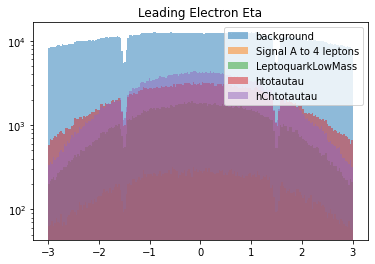

In [147]:
plt.hist(np.asarray(background), bins=200, alpha=0.5, label = 'background')
plt.hist(np.asarray(Ato4l_lepFilter), bins=200, alpha=0.5, label = 'Signal A to 4 leptons')
plt.hist(np.asarray(leptoquark), bins=200, alpha=0.5, label = 'LeptoquarkLowMass')
plt.hist(np.asarray(hToTauTau), bins=200, alpha=0.5, label = 'htotautau')
plt.hist(np.asarray(hchToTauNu), bins=200, alpha=0.5, label = 'hChtotautau')

plt.xscale('linear')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Leading Electron Eta')

In [119]:
f2 = h5py.File('background_for_training.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,0]
background = [i for i in leadingPTelectrons if i != 0]


In [120]:
f2 = h5py.File('Ato4l_lepFilter_13TeV.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,0]
Ato4l_lepFilter = [i for i in leadingPTelectrons if i != 0]


In [121]:
f2 = h5py.File('hToTauTau_13TeV_PU20.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,0]
hToTauTau = [i for i in leadingPTelectrons if i != 0]


In [122]:
f2 = h5py.File('hChToTauNu_13TeV_PU20.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,0]
hchToTauNu = [i for i in leadingPTelectrons if i != 0]


In [123]:
f2 = h5py.File('leptoquark_LOWMASS_lepFilter_13TeV.h5', "r")
particles2 = f2['Particles'][()]
electrons = particles2[:,1:5]
leadingPTelectrons = electrons[:,0][:,0]
leptoquark = [i for i in leadingPTelectrons if i != 0]


Text(0.5, 1.0, 'Leading Electron Pt')

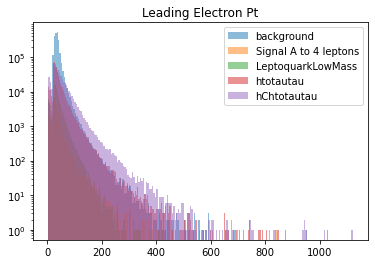

In [125]:
plt.hist(np.asarray(background), bins=200, alpha=0.5, label = 'background')
plt.hist(np.asarray(Ato4l_lepFilter), bins=200, alpha=0.5, label = 'Signal A to 4 leptons')
plt.hist(np.asarray(leptoquark), bins=200, alpha=0.5, label = 'LeptoquarkLowMass')
plt.hist(np.asarray(hToTauTau), bins=200, alpha=0.5, label = 'htotautau')
plt.hist(np.asarray(hchToTauNu), bins=200, alpha=0.5, label = 'hChtotautau')

plt.xscale('linear')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Leading Electron Pt')

In [36]:
f2 = h5py.File('background_for_training.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,0].reshape(-1).tolist()

background = [i for i in electrons if i != 0]


In [37]:
f2 = h5py.File('hToTauTau_13TeV_PU20.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,0].reshape(-1).tolist()

hToTauTau = [i for i in electrons if i != 0]


In [38]:
f2 = h5py.File('hChToTauNu_13TeV_PU20.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,0].reshape(-1).tolist()

hchToTauNu = [i for i in electrons if i != 0]


In [39]:
f2 = h5py.File('Ato4l_lepFilter_13TeV.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,0].reshape(-1).tolist()

Ato4l_lepFilter = [i for i in electrons if i != 0]


In [40]:
f2 = h5py.File('leptoquark_LOWMASS_lepFilter_13TeV.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,0].reshape(-1).tolist()

leptoquark = [i for i in electrons if i != 0]


Text(0.5, 1.0, 'Electron Pt')

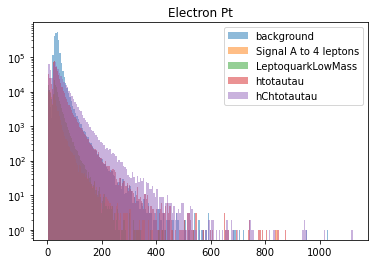

In [41]:
plt.hist(np.asarray(background), bins=200, alpha=0.5, label = 'background')
plt.hist(np.asarray(Ato4l_lepFilter), bins=200, alpha=0.5, label = 'Signal A to 4 leptons')
plt.hist(np.asarray(leptoquark), bins=200, alpha=0.5, label = 'LeptoquarkLowMass')
plt.hist(np.asarray(hToTauTau), bins=200, alpha=0.5, label = 'htotautau')
plt.hist(np.asarray(hchToTauNu), bins=200, alpha=0.5, label = 'hChtotautau')

plt.xscale('linear')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Electron Pt')

In [27]:
f2 = h5py.File('background_for_training.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,1][:,0]
electrons = electrons.tolist()
background = [i for i in electrons if i != 0]


In [159]:
f2 = h5py.File('background_for_training.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:4][:,:,0][:,0]
electrons = electrons.tolist()
background = [i for i in electrons if i != 0]


In [150]:
f2 = h5py.File('hToTauTau_13TeV_PU20.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:4][:,:,0][:,0]
electrons = electrons.tolist()
hToTauTau = [i for i in electrons if i != 0]


In [151]:
f2 = h5py.File('hChToTauNu_13TeV_PU20.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:4][:,:,0][:,0]
electrons = electrons.tolist()
hchToTauNu = [i for i in electrons if i != 0]


In [155]:
f2 = h5py.File('leptoquark_LOWMASS_lepFilter_13TeV.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:4][:,:,0][:,0]
electrons = electrons.tolist()
leptoquark = [i for i in electrons if i != 0]


In [153]:
f2 = h5py.File('Ato4l_lepFilter_13TeV.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:4][:,:,0][:,0]
electrons = electrons.tolist()
Ato4l_lepFilter = [i for i in electrons if i != 0]


Text(0.5, 1.0, 'Electron Pt')

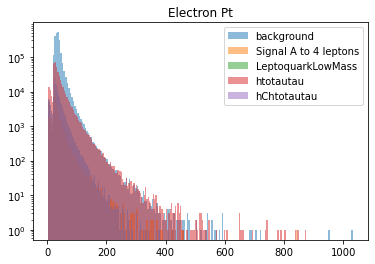

In [156]:
plt.hist(np.asarray(background), bins=200, alpha=0.5, label = 'background')
plt.hist(np.asarray(Ato4l_lepFilter), bins=200, alpha=0.5, label = 'Signal A to 4 leptons')
plt.hist(np.asarray(leptoquark), bins=200, alpha=0.5, label = 'LeptoquarkLowMass')
plt.hist(np.asarray(hToTauTau), bins=200, alpha=0.5, label = 'htotautau')
plt.hist(np.asarray(hchToTauNu), bins=200, alpha=0.5, label = 'hChtotautau')

plt.xscale('linear')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Electron Pt')

In [28]:
f2 = h5py.File('hToTauTau_13TeV_PU20.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,1][:,0]
electrons = electrons.tolist()
hToTauTau = [i for i in electrons if i != 0]


In [29]:
f2 = h5py.File('hChToTauNu_13TeV_PU20.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,1][:,0]
electrons = electrons.tolist()
hchToTauNu = [i for i in electrons if i != 0]


In [33]:
f2 = h5py.File('leptoquark_LOWMASS_lepFilter_13TeV.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,1][:,0]
electrons = electrons.tolist()
leptoquarks = [i for i in electrons if i != 0]


In [31]:
f2 = h5py.File('Ato4l_lepFilter_13TeV.h5', "r")
leptoquark = f2['Particles'][()]
electrons = leptoquark[:,1:5][:,:,1][:,0]
electrons = electrons.tolist()
Ato4l_lepFilter = [i for i in electrons if i != 0]


Text(0.5, 1.0, 'Muon Eta')

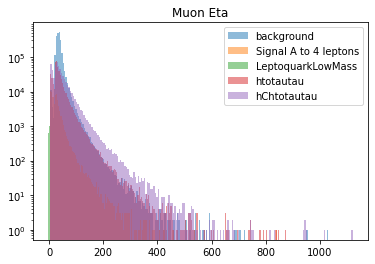

In [42]:
plt.hist(np.asarray(background), bins=200, alpha=0.5, label = 'background')
plt.hist(np.asarray(Ato4l_lepFilter), bins=200, alpha=0.5, label = 'Signal A to 4 leptons')
plt.hist(np.asarray(leptoquarks), bins=200, alpha=0.5, label = 'LeptoquarkLowMass')
plt.hist(np.asarray(hToTauTau), bins=200, alpha=0.5, label = 'htotautau')
plt.hist(np.asarray(hchToTauNu), bins=200, alpha=0.5, label = 'hChtotautau')

plt.xscale('linear')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Electron Eta')